### Setup

First, please make sure you are using a GPU runtime to run this notebook, so inference is much faster. If the following command fails, use the `Runtime` menu above and select `Change runtime type`.

In [ ]:
!nvidia-smi

Sun Dec 10 14:11:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Next, you should install `diffusers` as well `scipy`, `ftfy` and `transformers`. `accelerate` is used to achieve much faster loading.

In [ ]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git
!pip install transformers scipy ftfy accelerate
!pip install gradio

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-db7z_zuh
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-db7z_zuh
  Resolved https://github.com/huggingface/diffusers.git to commit 88bdd97ccd1f823510b9ed4e7f0ce5a44a0d2136
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.25.0.dev0-py3-none-any.whl size=1816330 sha256=d5eb509071e05efdb4ebe0cbd3161bda2639439dfe902e673ff982cac80f6698
  Stored in directory: /tmp/pip-ephem-wheel-cache-f_jqqtzl/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 71.0

In [ ]:
# install a checkpoint
import os
import subprocess
animemix = ['animemix_v3_offset.safetensors','https://civitai.com/api/download/models/60568']
animetarot = ['animetarotV51.safetensors','https://civitai.com/api/download/models/28609']
ck2use = animetarot
ckpt = ck2use[0]
!apt install axel
# !axel https://civitai.com/api/download/models/123021 --num-connections=20
if ckpt not in os.listdir() :
  subprocess.run(['axel', ck2use[1]])
os.listdir()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  axel
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 58.7 kB of archives.
After this operation, 204 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 axel amd64 2.17.11-1 [58.7 kB]
Fetched 58.7 kB in 1s (51.6 kB/s)
Selecting previously unselected package axel.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../axel_2.17.11-1_amd64.deb ...
Unpacking axel (2.17.11-1) ...
Setting up axel (2.17.11-1) ...
Processing triggers for man-db (2.10.2-1) ...


['.config', 'animetarotV51.safetensors', 'sample_data']

Now the stuff starts

In [ ]:
import torch
#from diffusers import StableDiffusionPipeline
from diffusers import DiffusionPipeline, EulerDiscreteScheduler, DPMSolverMultistepScheduler
#scheduler = EulerDiscreteScheduler.from_pretrained(repo_id, subfolder="scheduler")

#model_name = "google/ddpm-cifar10-32"
#model_name = "hakurei/waifu-diffusion" # waifu diffusion
#model_name = "./animemix_v3_offset.safetensor"
#model_name = "Linaqruf/animagine-xl" # idk
#model_name = "CompVis/stable-diffusion" # sd - 1.4
#model_name = "stabilityai/stable-diffusion-2-1"
#model_name= "runwayml/stable-diffusion-v1-5"



################[GOOD ONES]
model_name = "redstonehero/mixprov4_v4"    ####[ GOOD ANIME]########3
#model_name = "Yntec/epiCPhotoGasm" #Realistic
#model_name = "nyxia/dynavision-xl"
#model_name ="stablediffusionapi/aniverse" #
#checkpoint_path="./123021"
#pipe = StableDiffusionPipeline.from_pretrained("hakurei/waifu-diffusion", torch_dtype=torch.float16)
pipe = DiffusionPipeline.from_pretrained(
    model_name, torch_dtype=torch.float16, safety_checker=None
)

pipe.to("cuda")


#pipe.load_lora_weights('.',weight_name=ckpt)
#pipeline.scheduler = UniPCMultistepScheduler.from_config(pipeline.scheduler.config)
#pipe.unet.load_attn_procs("./animemix_v3_offset.safetensors")
#pipe = LayeredDiffusionPipeline().ConnectCkpt(model_name, checkpoint_path=model_path, vae_path=vae_path)
#pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
#pipe.unet.load_attn_procs(model_path)
pipe.enable_vae_tiling()
#pipe.enable_xformers_memory_efficient_attention()
#pipe.enable_sequential_cpu_offload()




The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/379 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


And we are ready to generate images:

In [ ]:
'''
prompt="1 girl , black hair , single hair bun ,bun tied with red band , black eyes , loose yellow t-shirt , loose shorts , highly detailed , natural background wth mountains masterpiece "
prompt = "girl , "
Black and white , higly detailed.
young woman with a slender frame. brown hair , hairpin shaped like a paintbrush.
hazel eyes , frilled blouse , vintage jacket , boots.
'''
import random
import gradio
'''
gen1 = ""
if not gen1 :
  gen1 = random.randint(0,235346335233)
print("Seed :",gen1)
'''
from PIL import Image
# Now to display an image you can either save it such as:
#image.save(f"astronaut_rides_horse.png")
#negative_prompt = "EasyNegative, badhandv4, bad_prompt_version2-neg, verybadimagenegative_v1.3, sketch, painting"
#num_images = 4
def get_image(prompt,negative_prompt,width,height,inf_steps,guid_scale,num_images,seed):
  if not seed :
    seed = random.randint(0,235346335233)
  print("Seed :",seed)
  images= (pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    width=width,
    height=height,
    num_inference_steps=inf_steps,
    guidance_scale=guid_scale,
    num_images_per_prompt=num_images,
    generator=torch.manual_seed(seed),
  ).images)
  for i in range(len(images)) :
    images[i].save(str(i)+".png")
  ku = []
  for i in range(len(images)) :
    ku.append(Image.open(str(i)+".png"))
  return ku

demo = gradio.Interface(
    fn=get_image,
    inputs= [ "text" , "text" , gradio.Slider(0,1920) , gradio.Slider(0,1080) , gradio.Slider(0,100) , gradio.Slider(0,20) , gradio.Slider(1,20) , gradio.Number() ],
    outputs = [ gradio.Gallery() ]
)
demo.queue()
demo.launch(debug=True)
# or if you're in a google colab you can directly display it with

#grid = image_grid(image, rows=1, cols=num_images)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://b4dfd138cfc9a810e9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Seed : 41536234374


  0%|          | 0/40 [00:00<?, ?it/s]

Seed : 87063917579


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1522, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    re

Seed : 109726425114


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1522, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    re

Seed : 229243104742


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1522, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    re

Seed : 46464664.0


  0%|          | 0/40 [00:00<?, ?it/s]

Seed : 46464664.0


  0%|          | 0/40 [00:00<?, ?it/s]

Seed : 46464664.0


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1522, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    re

Seed : 46464664.0


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1522, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    re

Seed : 46466495.0


  0%|          | 0/30 [00:00<?, ?it/s]

Seed : 46466495.0


  0%|          | 0/30 [00:00<?, ?it/s]

Seed : 46466495.0


  0%|          | 0/30 [00:00<?, ?it/s]

Seed : 120021949929


  0%|          | 0/30 [00:00<?, ?it/s]

Seed : 171933323942


  0%|          | 0/30 [00:00<?, ?it/s]

Seed : 13537224668


  0%|          | 0/30 [00:00<?, ?it/s]

Seed : 169733023350


  0%|          | 0/30 [00:00<?, ?it/s]

Seed : 115055089635


  0%|          | 0/30 [00:00<?, ?it/s]

Seed : 54941908164


  0%|          | 0/45 [00:00<?, ?it/s]

Seed : 31673836861


  0%|          | 0/45 [00:00<?, ?it/s]

Seed : 106750742991


  0%|          | 0/45 [00:00<?, ?it/s]

Seed : 116793454792


  0%|          | 0/45 [00:00<?, ?it/s]

Seed : 92562779108


  0%|          | 0/45 [00:00<?, ?it/s]

Seed : 81619425935


  0%|          | 0/45 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://b4dfd138cfc9a810e9.gradio.live


In [ ]:
prompt="1 girl , black hair , single hair bun ,bun tied with red band , black eyes , loose yellow t-shirt , loose shorts , highly detailed , natural background wth mountains masterpiece "
prompt = "girl , "
prompt = '''
Black and white , higly detailed.
young woman with a slender frame. brown hair , hairpin shaped like a paintbrush.
hazel eyes , frilled blouse , vintage jacket , boots.
'''
import random
gen1 = ""
if not gen1 :
  gen1 = random.randint(0,235346335233)
print("Seed :",gen1)
# Now to display an image you can either save it such as:
#image.save(f"astronaut_rides_horse.png")
negative_prompt = "EasyNegative, badhandv4, bad_prompt_version2-neg, verybadimagenegative_v1.3, sketch, painting"
num_images = 4
images= (pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    width=512,
    height=512,
    num_inference_steps=40,
    guidance_scale=7.5,
    num_images_per_prompt=num_images,
    generator=torch.manual_seed(gen1),
).images)
# or if you're in a google colab you can directly display it with

#grid = image_grid(image, rows=1, cols=num_images)


Seed : 177996834401


  0%|          | 0/40 [00:00<?, ?it/s]

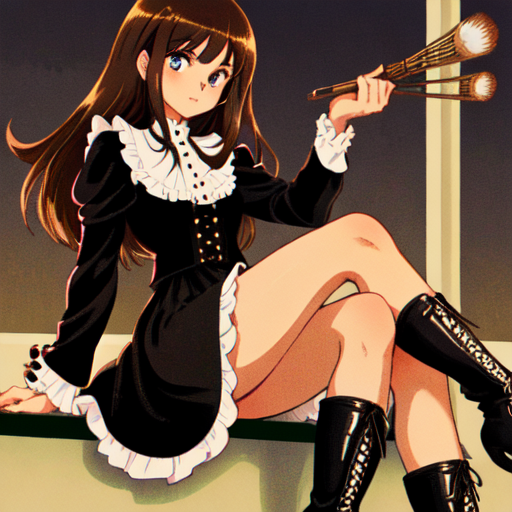

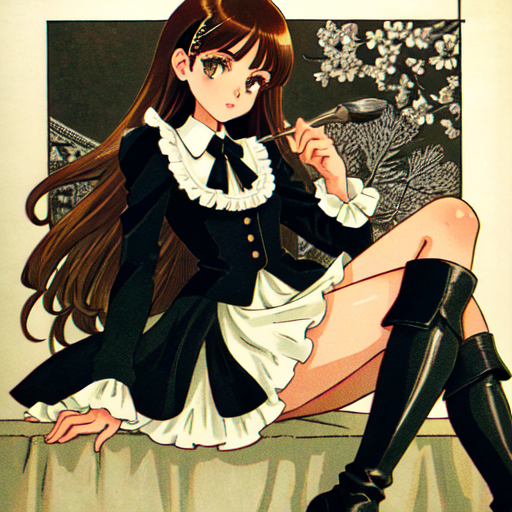

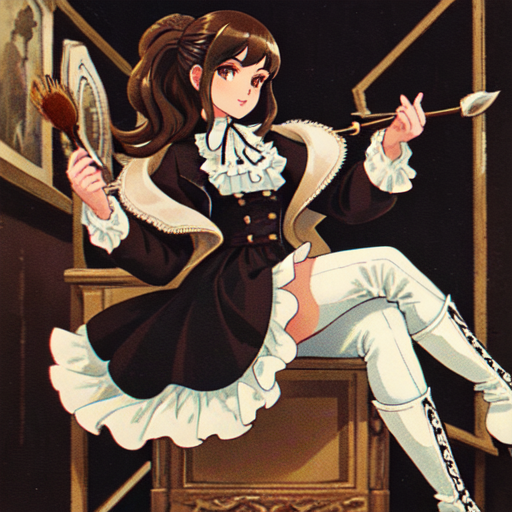

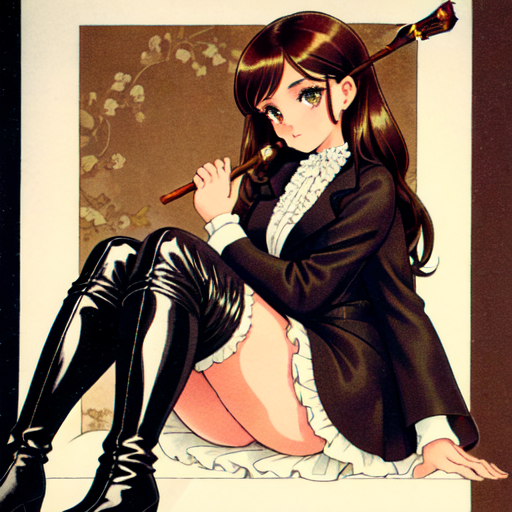

In [ ]:
from IPython.display import display
for i in images:
  display(i)


Reset

In [ ]:
# Just to reset cuda
torch.cuda.empty_cache()

Image upscaler

In [ ]:
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionUpscalePipeline
import torch

# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipeline = pipeline.to("cuda")

 #let's download an  image
#url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd2-upscale/low_res_cat.png"
#response = requests.get(url)
low_res_img = Image.open("./O8.jpg")
#low_res_img =

prompt = ""

upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
upscaled_image.save("upsampled_cat.png")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

OutOfMemoryError: ignored